# Potential Field

In this notebook you'll create a potential field by implementing and combining attractive and replusive forces. We can use the potential field to move in a direction closer to the goal (attraction) while avoiding obstacles (repulsion).

Recall from lecture that the attractive potential is:

$$F_{att} = \alpha * (x - x_{goal})$$

and repulsive potential, which is only computed when $d(x - x_{obs}) < Q_{max}$:

$$F_{rep} = \beta * (\frac{1}{Q_{max}} - \frac{1}{d(x - x_{obs})}) * \frac{1}{d(x - x_{obs})^2}$$

where $x_{goal}$ is the goal location, $x_{obs}$ is the obstacle location and $d(...)$ is the distance metric.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

In [4]:
def attraction(position, goal, alpha):
    # TODO: implement attraction force
    return alpha * (np.array(position) - np.array(goal))

In [5]:
def repulsion(position, obstacle, beta, q_max):
    # TODO: implement replusion force
    pos = np.array(position)
    obst = np.array(obstacle)
    dist_pos_obst = np.linalg.norm(pos - obst)
    return beta * (1/q_max - 1/dist_pos_obst) * 1/dist_pos_obst**2

Below we'll generate the potential field. For the purposes of the visualization we'll compute the field for the entire environment. Generally you'll only want to compute the field within a range around the current position for use in local planning.

In [8]:
def potential_field(grid, goal, alpha, beta, q_max):
    x = []
    y = []
    fx = []
    fy = []
    
    obs_i, obs_j = np.where(grid == 1)

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i, j] == 0:
                
                # add attraction force
                force = attraction([i, j], goal, alpha)

                for (oi, oj) in zip(obs_i, obs_j):
                    if np.linalg.norm(np.array([i, j]) - np.array([oi, oj])) < q_max:
                        # add replusion force
                        force += repulsion([i, j], [oi, oj], beta, q_max)
                    
                x.append(i)
                y.append(j)
                fx.append(force[0])
                fy.append(force[1])

    return x, y, fx, fy

def create_rand_grid(num_obst, x = 100, y = 100):
    """
    Random obstacles
    Input: x_size - optional, def = 100
           y_size - optional, dif = 100
           num_of_obst
    """
    grid = np.zeros((x,y))
    x_c = np.random.randint(1, x, num_obst)
    y_c = np.random.randint(1, x, num_obst)
    dx = np.random.randint(x//(3*num_obst),x//(num_obst), num_obst)
    dy = np.random.randint(y//(3*num_obst),y//(num_obst), num_obst)
    centers = list(zip(*[x_c, y_c]))
    for ind in range(num_obst):
        obstacle = [
            int(np.clip((x_c[ind] - dx[ind]), 0, x - 1)),
            int(np.clip((x_c[ind] + dx[ind]), 0, x - 1)),
            int(np.clip((y_c[ind] - dy[ind]), 0, y - 1)),
            int(np.clip((y_c[ind] + dy[ind]), 0, y - 1))
        ]
        grid[obstacle[0]:obstacle[1], obstacle[2]:obstacle[3]] = 1
        
    return grid

def sample_state(grid):
    x = np.random.uniform(0,grid.shape[0]) 
    y = np.random.uniform(0,grid.shape[1])
    #while grid[int(x), int(y)] ==1:
        #sample_state(grid)
    #print(x,y,int(x),int(y) ,grid[int(x),int(y)])
    return (x, y)

In [38]:
# generate environment
grid = create_rand_grid(5, 30, 30)
goal = sample_state(grid)
while grid[int(goal[0]), int(goal[1])] == 1:
    print('notyet', goal, int(goal[0]),int(goal[1]))
    goal = sample_state(grid)

#grid = np.zeros((30, 30))
#grid[10:15,10:15] = 1.0
#grid[17:25,10:17] = 1.0

#goal  = [5, 5]

# constants
alpha = 1.0
beta = 4.0
q_max = 10

Generating the potential field.

In [39]:
x, y, fx, fy = potential_field(grid, goal, alpha, beta, q_max)

Plotting the field. 

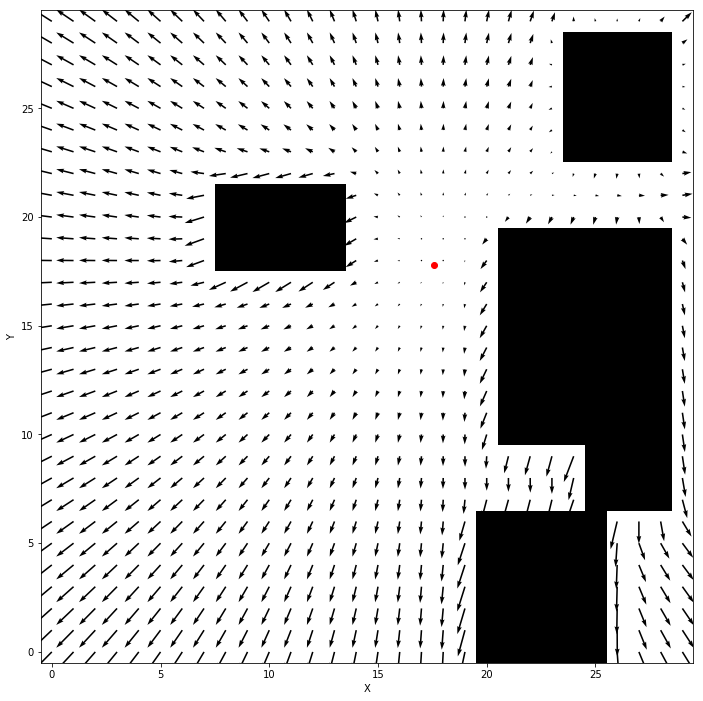

In [40]:
plt.imshow(grid, cmap = 'Greys', origin='lower')
plt.plot(goal[1], goal[0], 'ro')
plt.quiver(y, x, fy, fx)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

[Solution](./Potential-Field-Solution.ipynb)